# 1. Convert all xls files into csv format

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import cos, radians

In [2]:
folder_path = "../../Datasets/NYC_House_Price_Dataset/"

# for foldername, _, filenames in os.walk(folder_path + "xls/"):
#     for filename in filenames:
#         if filename.endswith(".xls"):
#             file_path = os.path.join(foldername, filename)
#             output_path = os.path.join(folder_path + "csv/", filename.replace(".xls", ".csv"))

#             try:
#                 df = pd.read_excel(file_path, engine="xlrd")
#                 df.columns = df.columns.str.strip()
#                 df.to_csv(output_path, index=False, encoding='utf-8-sig')
#                 print(f"successful conversion: {file_path} -> {output_path}")
#             except Exception as e:
#                 print(f"failed conversion: {file_path}, error: {e}")

# 2. Map coordinates generation

In [3]:
# year = ["200" + str(i) for i in range(3, 10)]
# year += ["20" + str(i) for i in range(10, 16)]
# district_dict = {"bronx": [2, "BX"], "brooklyn": [3, "BK"], "manhattan": [1, "MN"], "queens": [4, "QN"], "statenisland": [5, "SI"]}

In [4]:
# all_pos = set()
# for y in year:
#     for d in district_dict.keys():
#         file_path = folder_path + "csv/" + y + "_" + d + ".csv"
#         cur_df = pd.read_csv(file_path, encoding="utf-8-sig", low_memory=False)
#         address_number = set(cur_df["ADDRESS"].unique())
#         all_pos = all_pos.union(address_number)
#         print(f"{y + d} -> {len(address_number)}")
# print(len(all_pos))

In [5]:
# # import pluto csv file to get the lng and lat using bbl
# pluto_path = os.path.join(folder_path, "nyc_pluto_24v4_1_csv/pluto_24v4_1.csv")
# pluto = pd.read_csv(pluto_path, encoding="utf-8-sig", low_memory=False)

In [6]:
# # Print initial shape
# print(f"Original shape: {pluto.shape}")

# # Remove rows where latitude or longitude is null
# pluto = pluto.dropna(subset=["latitude", "longitude"])

# # Print final shape and verification info
# print(f"Shape after removing null locations: {pluto.shape}")
# print("\nVerification:")
# print(f"Null values in latitude: {pluto['latitude'].isnull().sum()}")
# print(f"Null values in longitude: {pluto['longitude'].isnull().sum()}")

# # Optional: Display sample of cleaned data
# print("\nSample of cleaned location data:")
# print(pluto[["borough", "block", "lot", "latitude", "longitude"]].head())

In [7]:
# pluto.isnull().sum()

In [8]:
# pluto.columns

Add latitude and longitude

In [9]:
# def process_csv_with_location(input_file, pluto_location, borough_map):
#     # Read CSV
#     print(f"Processing {input_file}...")
#     df = pd.read_csv(input_file, encoding="utf-8-sig", low_memory=False)
    
#     # Add borough code and merge with location data
#     df["borough_code"] = df["BOROUGH"].map(borough_map)
#     df = df.merge(
#         pluto_location,
#         how="left",
#         left_on=["borough_code", "BLOCK", "LOT"],
#         right_on=["borough", "block", "lot"]
#     )
    
#     # Clean up columns
#     df.drop(["borough_code", "borough", "block", "lot"], axis=1, inplace=True)
    
#     # Remove rows with missing locations
#     rows_before = len(df)
#     df = df.dropna(subset=["latitude", "longitude"])
#     rows_after = len(df)
    
#     print("-------------------------------------------------------------")
#     print(f"file name: {input_file}")
#     print(f"Rows before cleaning: {rows_before}")
#     print(f"Rows after cleaning: {rows_after}")
#     print(f"Removed {rows_before - rows_after} rows with missing locations")
#     print("-------------------------------------------------------------")
    
#     return df

# # Prepare PLUTO location data
# pluto_location = pluto[["borough", "block", "lot", "latitude", "longitude"]]
# borough_map = {1: "MN", 2: "BX", 3: "BK", 4: "QN", 5: "SI"}

# # Process all CSV files
# csv_folder = folder_path + "csv/"
# output_folder = folder_path + "csv_with_location/"

# # Create output folder if it doesn't exist
# os.makedirs(output_folder, exist_ok=True)

# # Process each CSV file
# for filename in os.listdir(csv_folder):
#     if filename.endswith(".csv"):
#         input_path = os.path.join(csv_folder, filename)
#         output_path = os.path.join(output_folder, f"located_{filename}")
        
#         # Process file
#         processed_df = process_csv_with_location(input_path, pluto_location, borough_map)
        
#         # Save processed file
#         processed_df.to_csv(output_path, index=False)
#         print(f"Saved processed file to: {output_path}\n")

# print("All files processed successfully!")

Combine into one file

In [10]:
# def merge_all_files(input_folder, output_file):
#     """
#     Merge all processed CSV files and sort by sale date
#     """
#     print("Starting file merge process...")
    
#     # Get all CSV files
#     files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]
    
#     # Initialize empty list to store DataFrames
#     dfs = []
    
#     # Process each file
#     for filename in files:
#         print(f"Reading {filename}...")
#         filepath = os.path.join(input_folder, filename)
#         df = pd.read_csv(filepath)
#         dfs.append(df)
    
#     # Concatenate all DataFrames
#     print("Merging files...")
#     final_df = pd.concat(dfs, ignore_index=True)
    
#     # Convert and sort by sale date
#     print("Sorting by sale date...")
#     final_df["SALE DATE"] = pd.to_datetime(final_df["SALE DATE"])
#     final_df = final_df.sort_values("SALE DATE")
#     final_df.rename(columns={"latitude": "LAT"}, inplace=True)
#     final_df.rename(columns={"longitude": "LNG"}, inplace=True)
    
#     # Save merged file
#     print(f"Saving merged file to {output_file}...")
#     final_df.to_csv(output_file, index=False)
    
#     print(f"\nMerge complete!")
#     print(f"Total records: {len(final_df)}")
#     print(f"Date range: {final_df['SALE DATE'].min()} to {final_df['SALE DATE'].max()}")
    
#     return final_df

# # Execute the merge
# input_folder = folder_path + "csv_with_location/"
# output_file = folder_path + "nyc_sales_03_15.csv"

# merged_df = merge_all_files(input_folder, output_file)

# 3. EDA for merged file

In [11]:
nyc_sales_path = os.path.join(folder_path, "nyc_sales_03_15.csv")
nyc_df = pd.read_csv(nyc_sales_path, encoding="utf-8-sig", low_memory=False)

In [12]:
nyc_df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'LAT', 'LNG'],
      dtype='object')

Already remove nan value, drop some unused columns then remove some rows with zero values

In [13]:
nyc_df.drop(columns=["NEIGHBORHOOD", "EASE-MENT", "ADDRESS", "APARTMENT NUMBER"], inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns_convert = ["BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT PRESENT", "BUILDING CLASS AT TIME OF SALE"]
for col in columns_convert:
    nyc_df[col] = le.fit_transform(nyc_df[col])

In [15]:
def remove_zero_rows(df, columns_to_check):
    # Print initial shape
    print(f"Initial shape: {df.shape}")
    
    # Create a mask for rows where any specified column has zero
    mask = ~(df[columns_to_check] == 0).any(axis=1)
    
    # Apply the mask and get the filtered DataFrame
    df = df[mask]
    
    # Print results
    print(f"Final shape: {df.shape}")
    print(f"Removed {len(df) - len(df)} rows")
    
    return df

In [16]:
columns_to_check = ['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', "YEAR BUILT", "SALE DATE"]
nyc_df = remove_zero_rows(nyc_df, columns_to_check)

print("\nVerification for specified columns:")
for col in columns_to_check:
    print(f"\n{col}:")
    print(f"Min value: {nyc_df[col].min()}")
    print(f"Zero values: {(nyc_df[col] == 0).sum()}")

Initial shape: (927918, 19)
Final shape: (433820, 19)
Removed 0 rows

Verification for specified columns:

SALE PRICE:
Min value: 1
Zero values: 0

GROSS SQUARE FEET:
Min value: 1
Zero values: 0

LAND SQUARE FEET:
Min value: 51
Zero values: 0

YEAR BUILT:
Min value: 1050
Zero values: 0

SALE DATE:
Min value: 2003-01-01
Zero values: 0


plot distribution before removing outliers

In [17]:
def plot_kde_distributions(
        df: pd.DataFrame,
        columns: list,
        bw_adjust: float = 0.3, 
        figsize: tuple = (14, 6)
    ) -> None:
    for i in range(0, len(columns), 2):
        plt.figure(figsize=figsize)
        
        # First subplot
        plt.subplot(1, 2, 1)
        sns.kdeplot(data=df, x=columns[i], bw_adjust=bw_adjust, fill=True)
        plt.title(f'{columns[i]} Distribution (KDE)')
        plt.xlabel(columns[i])
        print(df[columns[i]].min())
        print(df[columns[i]].max())
        
        # Second subplot (if available)
        if i + 1 < len(columns):
            plt.subplot(1, 2, 2)
            sns.kdeplot(data=df, x=columns[i+1], bw_adjust=bw_adjust, fill=True)
            plt.title(f'{columns[i+1]} Distribution (KDE)')
            plt.xlabel(columns[i+1])
            print(df[columns[i+1]].min())
            print(df[columns[i+1]].max())
        
        plt.tight_layout()
        plt.show()

0
8759
0
4964


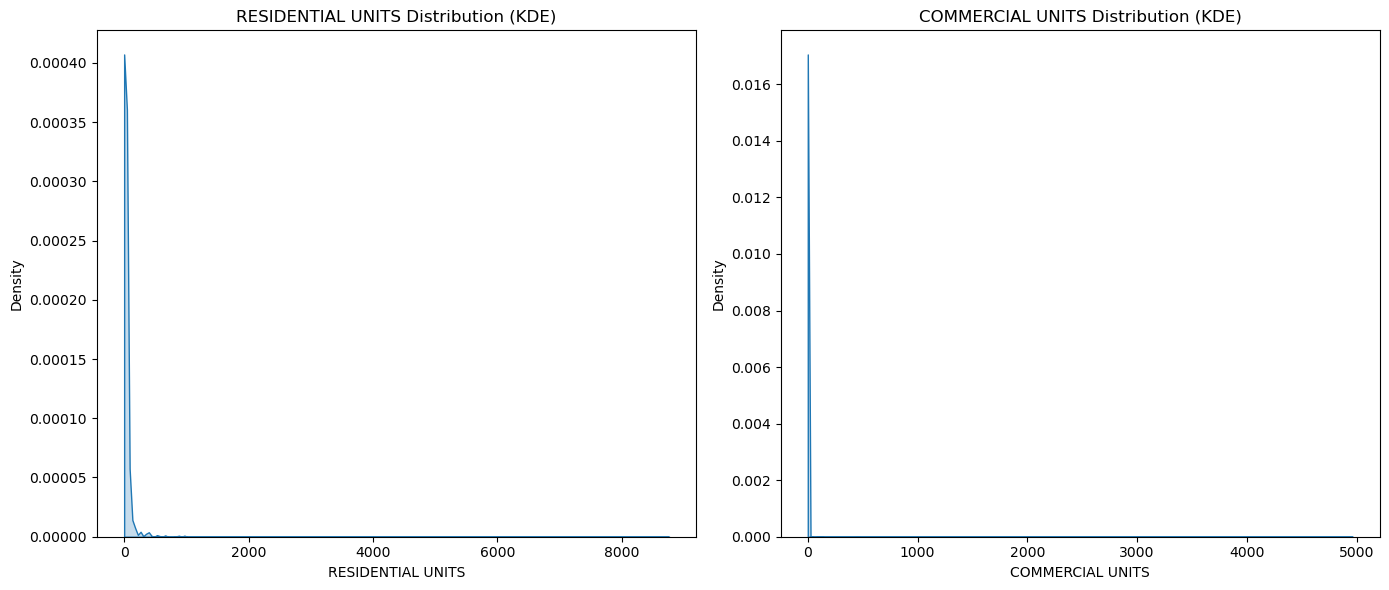

0
8805
51
214755710


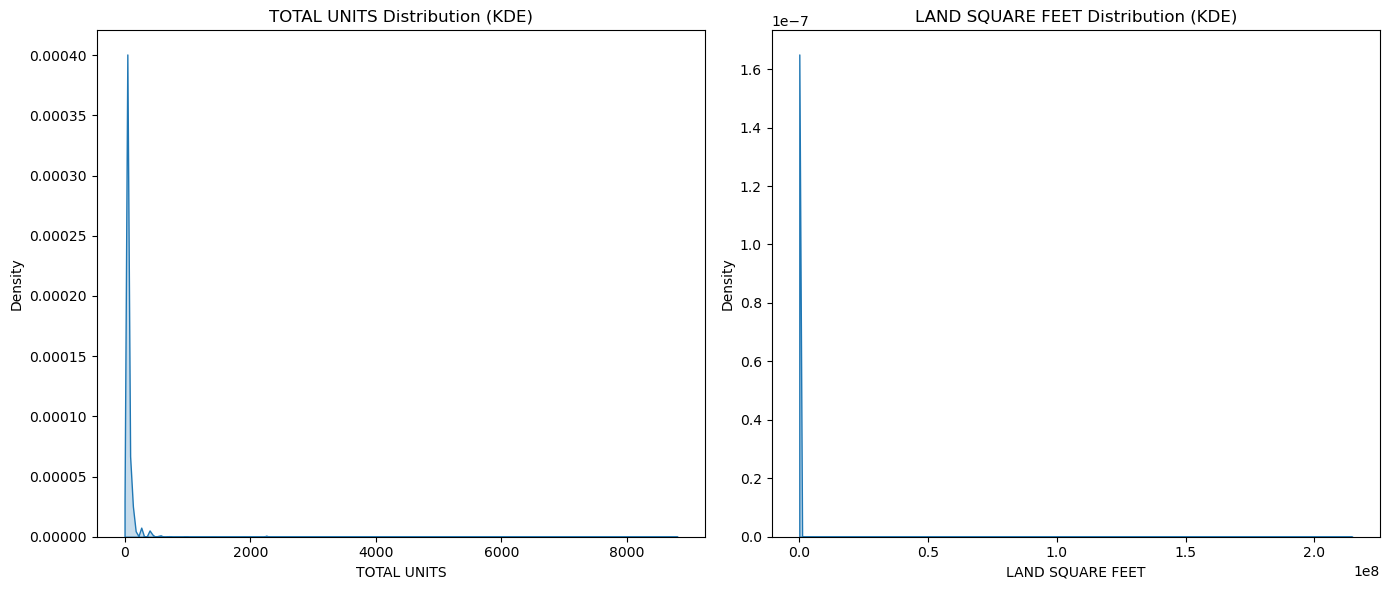

1
14962152
1050
2016


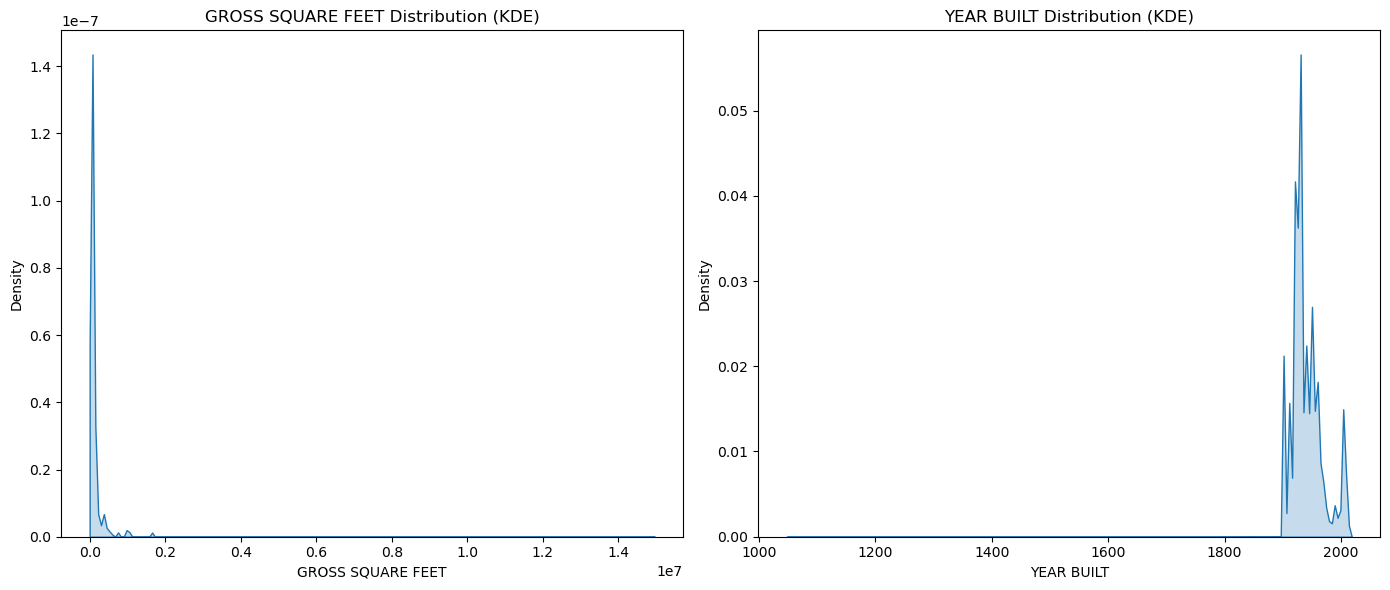

1
4111111766


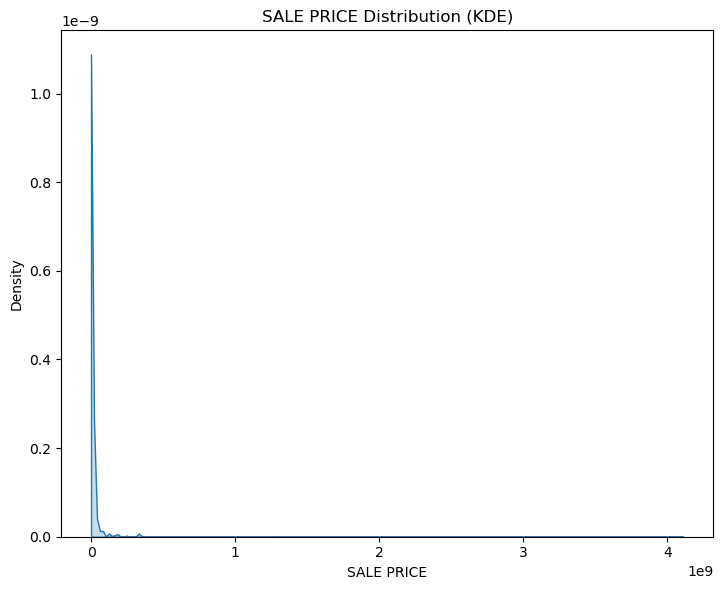

In [18]:
columns_to_plot = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
                   'TOTAL UNITS', 'LAND SQUARE FEET',
                   'GROSS SQUARE FEET', 'YEAR BUILT',
                   'SALE PRICE']
plot_kde_distributions(nyc_df, columns_to_plot)

In [19]:
from scipy import stats


def remove_outliers_fitted(df, col: str, upper_quantile=0.99, lower_quantile=0.01):
    data = df[col].values
    shift = np.min(data)
    if shift <= 0:
        shift = abs(shift) + 1e-8
        data = data + shift
    
    transformed_data, lambda_val = stats.boxcox(data)

    lower = np.percentile(transformed_data, lower_quantile * 100)
    upper = np.percentile(transformed_data, upper_quantile * 100)

    lower_original = (lower * lambda_val + 1) ** (1 / lambda_val) - shift
    upper_original = (upper * lambda_val + 1) ** (1 / lambda_val) - shift
    print(f"lower_original: {lower_original}, upper_original: {upper_original}")

    df = df[(df[col] >= lower_original) & (df[col] <= upper_original)]
    return df

In [20]:
# handle year built based on fact
outliers = {
    'RESIDENTIAL UNITS': (0.97, 0.00),
    'COMMERCIAL UNITS': (0.99, 0.00),
    'TOTAL UNITS': (0.99, 0.00),
    'LAND SQUARE FEET': (0.98, 0.00),
    'GROSS SQUARE FEET': (0.98, 0.01),
    'SALE PRICE': (0.98, 0.01)
}
for col in outliers.keys():
    print("before: ", len(nyc_df))
    nyc_df = remove_outliers_fitted(nyc_df, col, outliers[col][0], outliers[col][1])
    print("after: ", len(nyc_df))
    print("--------------------------")

before:  433820
lower_original: -2.034864306880448e-22, upper_original: 11.000000000000002
after:  420948
--------------------------
before:  420948
lower_original: -1.819797347616661e-23, upper_original: 3.000000000000001
after:  417805
--------------------------
before:  417805
lower_original: 4.963083675318166e-23, upper_original: 7.999999999999996
after:  411350
--------------------------
before:  411350
lower_original: -4.263256414560601e-14, upper_original: 9312.000000000011
after:  403071
--------------------------
before:  403071
lower_original: 776.9999999999987, upper_original: 112848.99999999974
after:  388194
--------------------------
before:  388194
lower_original: 9.000000000000002, upper_original: 1899998.999999998
after:  378871
--------------------------


0
11
0
3


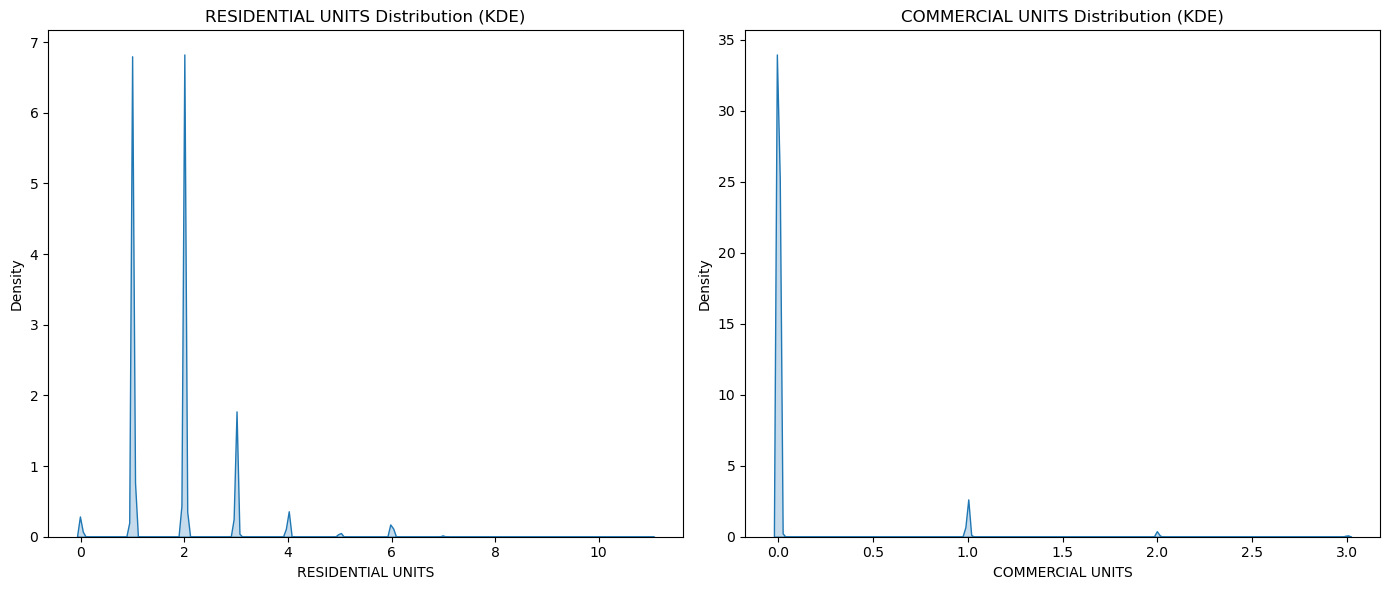

1
7
200
9310


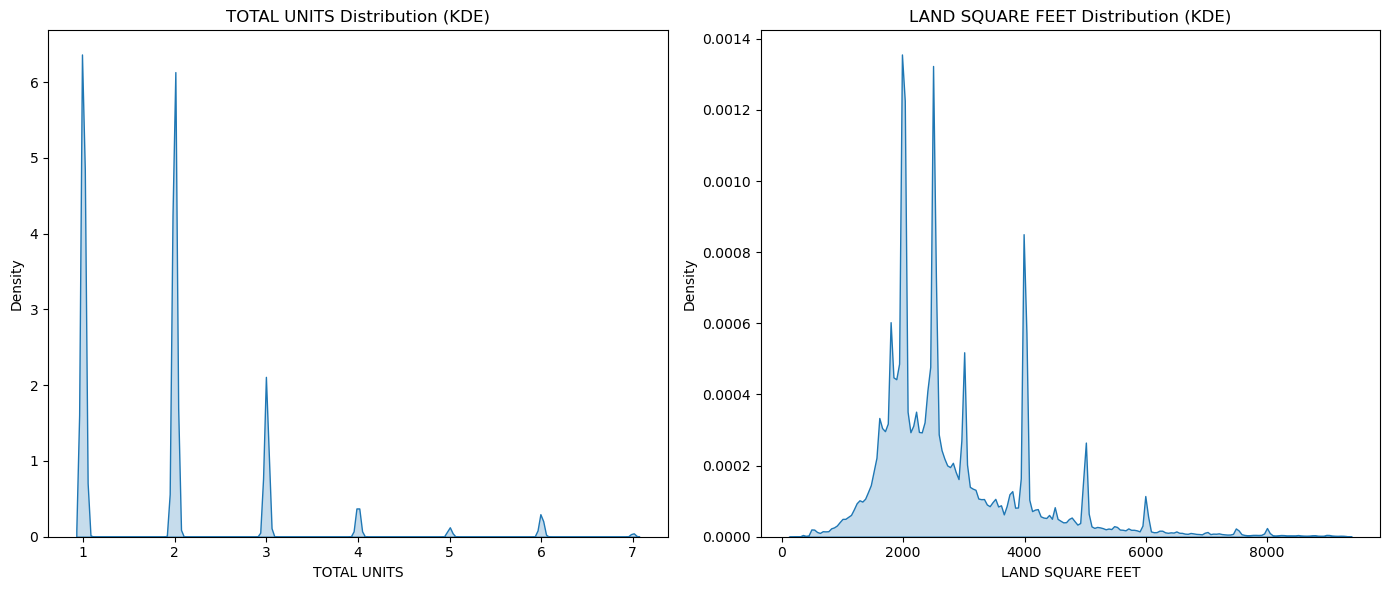

777
90327
1380
2016


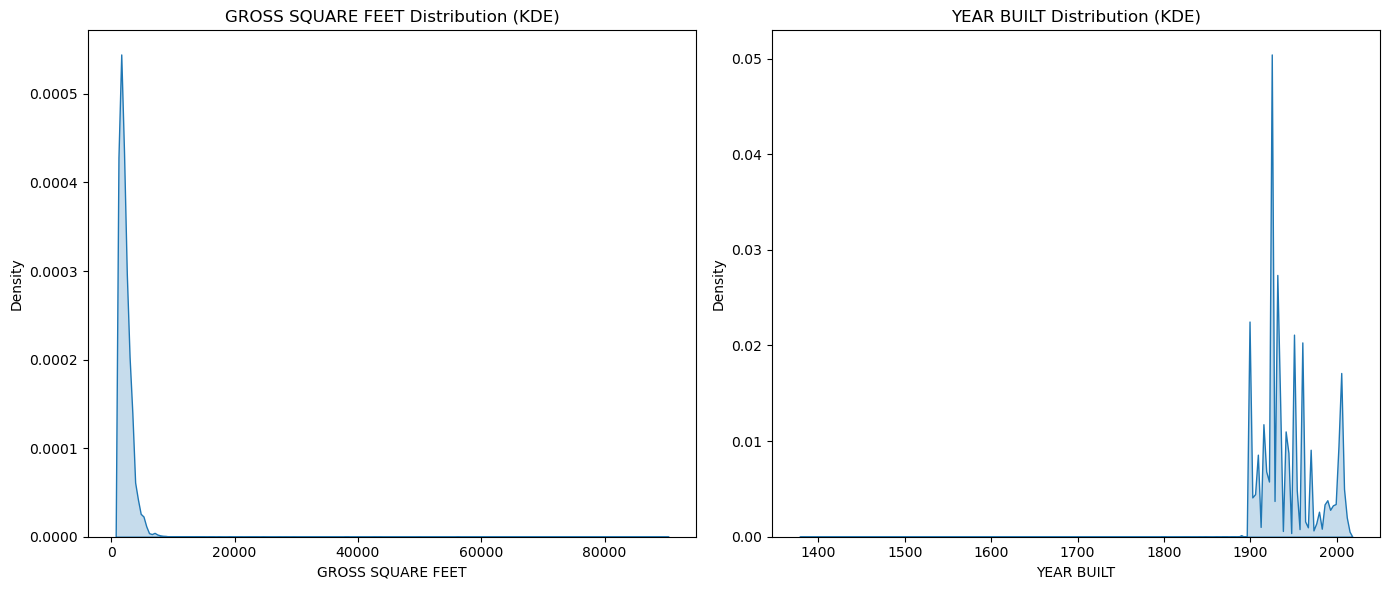

10
1899000


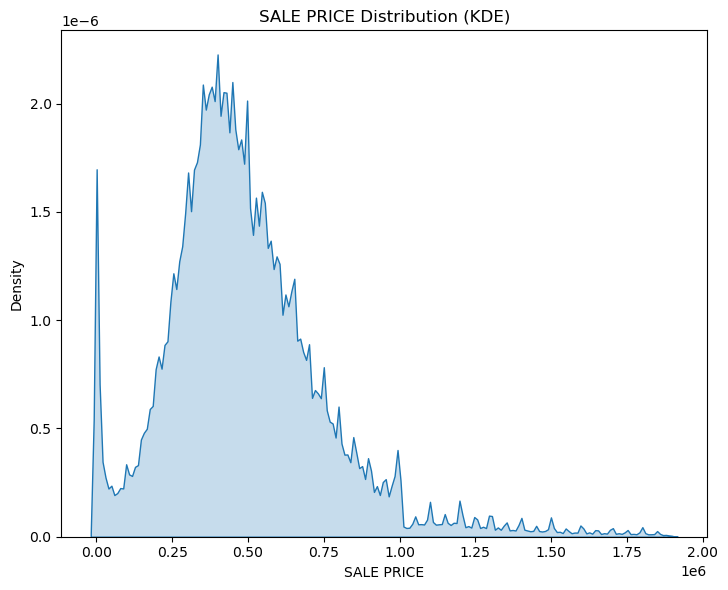

In [21]:
plot_kde_distributions(nyc_df, columns_to_plot)

In [22]:
nyc_df = nyc_df[nyc_df["YEAR BUILT"] > 1626]
len(nyc_df)

378869

convert the time, time interval: 1 month

In [23]:
# convert trade time into year+month, as the time interval size is one month
nyc_df["SALE DATE"] = pd.to_datetime(nyc_df["SALE DATE"])
# nyc_df['SALE MONTH'] = nyc_df['SALE DATE'].dt.strftime('%Y-%m')
nyc_df = nyc_df[nyc_df["SALE DATE"] >= '2003-01-01']
nyc_df = nyc_df.sort_values(by="SALE DATE")
nyc_df['MONTH'] = nyc_df["SALE DATE"].dt.year * 12 + nyc_df["SALE DATE"].dt.month

In [24]:
nyc_df["MONTH"].unique()

array([24037, 24038, 24039, 24040, 24041, 24042, 24043, 24044, 24045,
       24046, 24047, 24048, 24049, 24050, 24051, 24052, 24053, 24054,
       24055, 24056, 24057, 24058, 24059, 24060, 24061, 24062, 24063,
       24064, 24065, 24066, 24067, 24068, 24069, 24070, 24071, 24072,
       24073, 24074, 24075, 24076, 24077, 24078, 24079, 24080, 24081,
       24082, 24083, 24084, 24085, 24086, 24087, 24088, 24089, 24090,
       24091, 24092, 24093, 24094, 24095, 24096, 24097, 24098, 24099,
       24100, 24101, 24102, 24103, 24104, 24105, 24106, 24107, 24108,
       24109, 24110, 24111, 24112, 24113, 24114, 24115, 24116, 24117,
       24118, 24119, 24120, 24121, 24122, 24123, 24124, 24125, 24126,
       24127, 24128, 24129, 24130, 24131, 24132, 24133, 24134, 24135,
       24136, 24137, 24138, 24139, 24140, 24141, 24142, 24143, 24144,
       24145, 24146, 24147, 24148, 24149, 24150, 24151, 24152, 24153,
       24154, 24155, 24156, 24157, 24158, 24159, 24160, 24161, 24162,
       24163, 24164,

build distance column

In [25]:
lat = nyc_df["LAT"]
lng = nyc_df["LNG"]

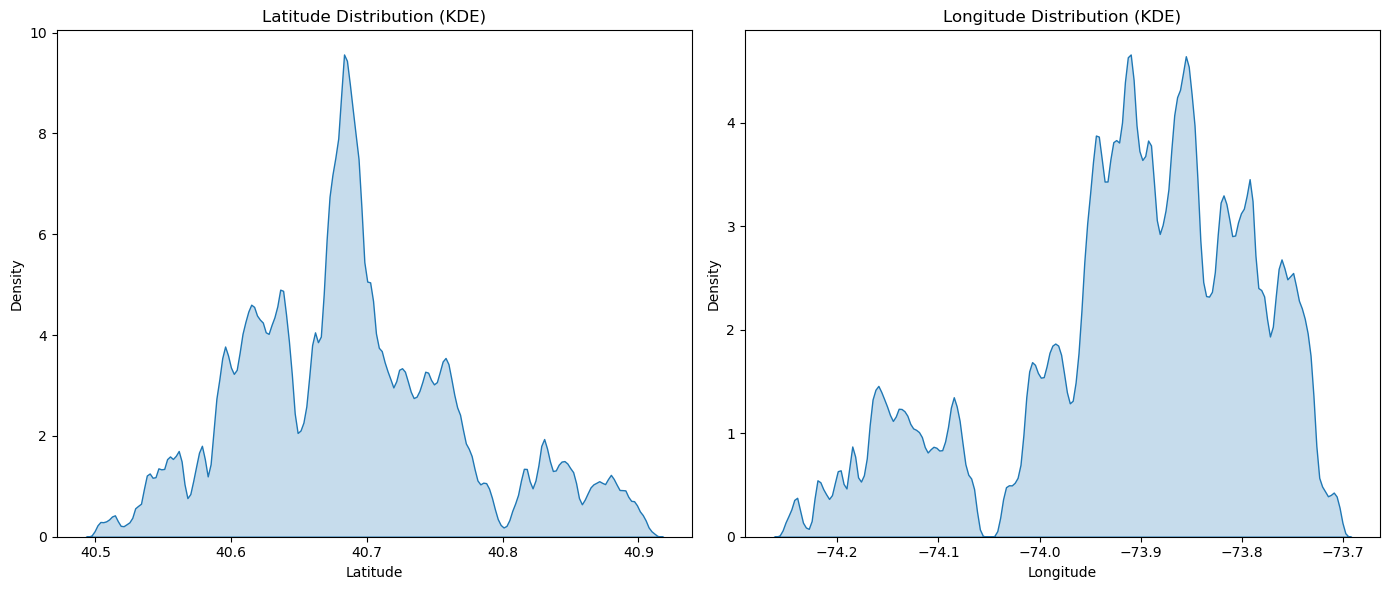

In [26]:
plt.figure(figsize=(14, 6))

# Latitude distribution
plt.subplot(1, 2, 1)
sns.kdeplot(data=nyc_df, x='LAT', bw_adjust=0.3, fill=True)
plt.title('Latitude Distribution (KDE)')
plt.xlabel('Latitude')

# Longitude distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data=nyc_df, x='LNG', bw_adjust=0.3, fill=True)
plt.title('Longitude Distribution (KDE)')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

In [27]:
lat_min, lat_max = lat.min(), lat.max()
lng_min, lng_max = lng.min(), lng.max()

# calculate the center coordinate
center_lat = (lat_min + lat_max) / 2
center_lng = (lng_min + lng_max) / 2
print(lat_min, lat_max)
print(lng_min, lng_max)
print(center_lat, center_lng)

40.4985796 40.9126067
-74.2541463 -73.700419
40.70559315 -73.97728265


In [28]:
from math import radians, cos, sin, asin, sqrt

def distance(lat2, long2, lat1, long1): 
    long1 = radians(long1) 
    long2 = radians(long2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlong = long2 - long1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlong / 2)**2
  
    c = 2 * asin(sqrt(a))  
    r = 6371 # Radius of earth in kilometers
    return(c * r) 


nyc_df['DISTANCE'] = nyc_df.apply(lambda x: distance (x['LAT'],x['LNG'], center_lat, center_lng),axis=1)

convert data types

In [29]:
nyc_df.dtypes

BOROUGH                                    int64
BUILDING CLASS CATEGORY                    int64
TAX CLASS AT PRESENT                       int64
BLOCK                                      int64
LOT                                        int64
BUILDING CLASS AT PRESENT                  int64
ZIP CODE                                   int64
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE             int64
SALE PRICE                                 int64
SALE DATE                         datetime64[ns]
LAT                                      float64
LNG                                      float64
MONTH                                      int32
DISTANCE            

In [31]:
# Get columns with int64 dtype
int_columns = nyc_df.select_dtypes(include=['int64', 'int32']).columns

# Convert int64 to float64
nyc_df[int_columns] = nyc_df[int_columns].astype('float64')

# Verify conversion
print("Column dtypes after conversion:")
print(nyc_df.dtypes)

Column dtypes after conversion:
BOROUGH                                  float64
BUILDING CLASS CATEGORY                  float64
TAX CLASS AT PRESENT                     float64
BLOCK                                    float64
LOT                                      float64
BUILDING CLASS AT PRESENT                float64
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                               float64
TAX CLASS AT TIME OF SALE                float64
BUILDING CLASS AT TIME OF SALE           float64
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
LAT                                      float64
LNG                                      float64
MONTH                                

In [32]:
nyc_df.reset_index(inplace=True)
nyc_df.drop(['index'],axis=1,inplace=True)

In [33]:
saved_path = os.path.join(folder_path, "nyc_sales_03_15_cleaned.csv")
nyc_df.to_csv(saved_path, index=False)